# Project: Recognizing Traffic Signs Using Deep Learning
### Scope: Dataset Overview and Exploration
##### Author: Ashish Panchal (epababl03.ashishp@iima.ac.in)


In [1]:
# Load/Import Libraries
import sys
import os
import numpy as np
import statistics
import matplotlib.pyplot as plt

# Local python modules
sys.path.insert(0, os.path.abspath('../src/util'))
sys.path.insert(1, os.path.abspath('../src/data'))

from util import Util
from dataloader import load_interim_data
from explore import get_image_per_class
from explore import summarize_stats
from explore import histogram_plot
from explore import plot_dataset_distributions

# 2. Dataset
The dataset used is:
The German Traffic Sign Recognition Benchmark (GTSRB)

### 2.1. GTSRB Dataset Overview
For this project, we use a German traffic sign dataset from German Dataset, accessible through http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset#Annotationformat

Our training, validation, and testing dataset in pickle format. Each dataset contains number of images and it’s label.Single-image, multi-class classification problem
More than 40 classes
More than 50,000 images in total
Large, lifelike database
Reliable ground-truth data due to semi-automatic annotation
Physical traffic sign instances are unique within the dataset(i.e., each real-world traffic sign only occurs once)

In [2]:
#Load Signs Labels from signnames.csv
util1 = Util()
signs = util1.class_lables

In [3]:
#Load Image data
interim_datasets = load_interim_data()
train, test, valid = interim_datasets[0], interim_datasets[1], interim_datasets[2]

Loading /Users/apanchal/EPABA/iima-epaba-batch03/data/interim/train.p
Loading /Users/apanchal/EPABA/iima-epaba-batch03/data/interim/test.p
Loading /Users/apanchal/EPABA/iima-epaba-batch03/data/interim/valid.p
Loading /Users/apanchal/EPABA/iima-epaba-batch03/data/interim/train_plus_valid.p


The pickled data is a dictionary with 4 key/value pairs:

'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
'labels' is a 2D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.
These coordinates assume the original image. The pickled data contains resized versions (32 by 32) of these images.

The code snippets below will provide a basic summery of the Dataset.

First, we will use numpy provide the number of images in each subset, in addition to the image size, and the number of unique classes.

In [4]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples
n_test = X_test.shape[0]

# Number of validation examples.
n_validation = X_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print('----- Complete Basic Data Summary ----- ')
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of training examples: ", n_train)
print("Number of testing examples: ", n_test)
print("Number of validation examples: ", n_validation)
print()


----- Complete Basic Data Summary ----- 
Image data shape = (32, 32, 3)
Number of classes = 43
Number of training examples:  34799
Number of testing examples:  12630
Number of validation examples:  4410



### 2.2. Dataset Summary and Exploratory

Number of training samples, the percent of training samples, and the percent of validation samples for each of the 43 
classes in training data can be seen below:

/Users/apanchal/EPABA/iima-epaba-batch03/src/data/explore.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_images[y[i]] == 'None':


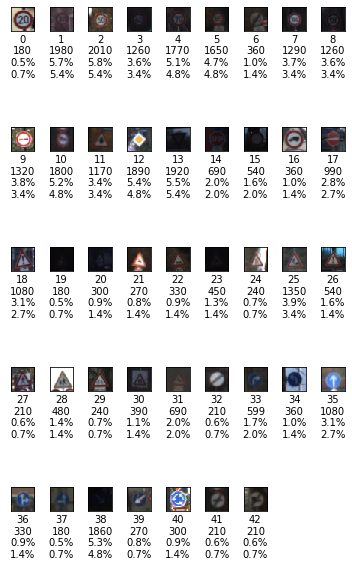

In [5]:
# Display a list of training images, one from each class
class_images = get_image_per_class(X_train, y_train, n_classes)
summarize_stats(class_images, y_train, y_valid)

A histogram over the classes in the training set, testing set, and validation set can be seen in Figure 2.2. 

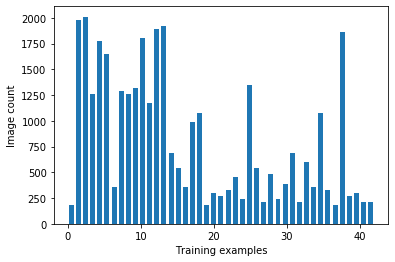

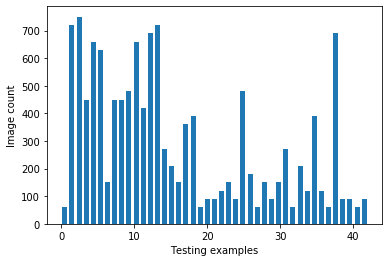

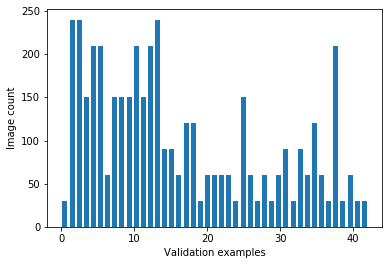

In [6]:
histogram_plot(y_train, "Training examples", n_classes)
histogram_plot(y_test, "Testing examples", n_classes)
histogram_plot(y_valid, "Validation examples", n_classes)

Training and Validation Data Distribution 

Dataset Training contains 34799 samples
median=1.55%  mean=2.33%
Dataset Validation contains 4410 samples
median=1.36%  mean=2.33%


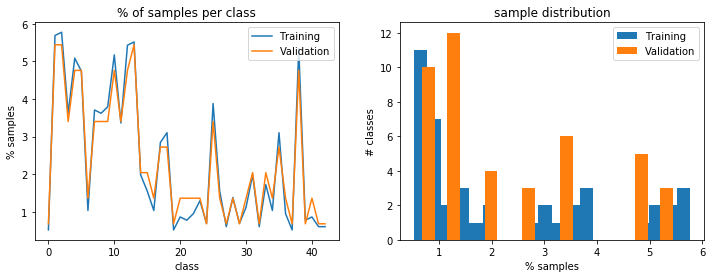

In [7]:
# Let's check if there's similar representation of image classes in the Training and Validation datasets
y_hist = plot_dataset_distributions(datasets=[y_train, y_valid], set_descs=["Training", "Validation"])
y_train_hist = y_hist[0]
y_valid_hist = y_hist[1]

Representation stats for validation and training datasets per-class

In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.
A high ratio means that the class has a larger represnetation in the validation dataset.
Ratio: median=1.01  avg=1.11

Class  Validation Train  Ratio
-----  ---------- -----  -----
  0      0.68%    0.52%   1.32
  1      5.44%    5.69%   0.96
  2      5.44%    5.78%   0.94
  3      3.40%    3.62%   0.94
  4      4.76%    5.09%   0.94
  5      4.76%    4.74%   1.00
  6      1.36%    1.03%   1.32
  7      3.40%    3.71%   0.92
  8      3.40%    3.62%   0.94
  9      3.40%    3.79%   0.90
 10      4.76%    5.17%   0.92
 11      3.40%    3.36%   1.01
 12      4.76%    5.43%   0.88
 13      5.44%    5.52%   0.99
 14      2.04%    1.98%   1.03
 15      2.04%    1.55%   1.32
 16      1.36%    1.03%   1.32
 17      2.72%    2.84%   0.96
 18      2.72%    3.10%   0.88
 19      0.68%    0.52%   1.32
 20      1.36%    0.86%   1.58
 21 

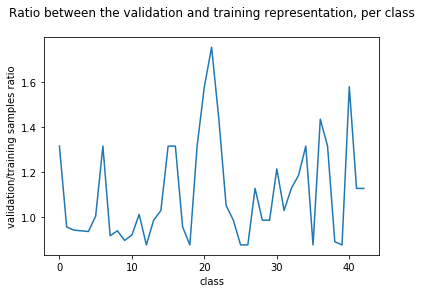

In [8]:
'''
Print the validation and training datasets per-class representation stats.
The 'ratio' column shows the ratio between the class's representation in the 
training set and its representation in the validation set.
'''
ratio = y_valid_hist/y_train_hist
print("In the following table and graph, a ratio close to 1 indicates that there about the same fraction of validation samples as training samples, in the specific class.")
print("A high ratio means that the class has a larger represnetation in the validation dataset.")
print("Ratio: median={:.2f}  avg={:.2f}\n".format(statistics.median(ratio), statistics.mean(ratio)))
print("Class  Validation Train  Ratio")
print("-----  ---------- -----  -----")
for i in range(n_classes):
    print("{:3} {:9.2f}% {:7.2f}% {:6.2f}".format(i, y_valid_hist[i], y_train_hist[i], ratio[i]))

plt.plot(range(n_classes), y_valid_hist/y_train_hist)
plt.title('Ratio between the validation and training representation, per class\n')
plt.xlabel('class')
plt.ylabel('validation/training samples ratio')
plt.savefig('../plots/data_explore/Ratio between the validation and training representation, per class.png')
plt.show()

### Couple of inferences from the data exploration that we had tackled during the preprocessing stage
1.	Class bias issue as some classes seem to be underrepresented
2.	Image contrast seems to be low for lot of images


In [9]:
# store main data for furthur procesing 

# No. of classes
%store n_classes

# class labels
%store signs

# Training Dataset
%store X_train
%store y_train

# Test Dataset
%store X_test
%store y_test


# Validation Dataset
%store X_valid
%store y_valid

Stored 'n_classes' (int)
Stored 'signs' (dict)
Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_test' (ndarray)
Stored 'X_valid' (ndarray)
Stored 'y_valid' (ndarray)
